In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
df_labeled = pd.read_csv("labeled_data.csv").drop(columns=["Unnamed: 0"])
matrix = pd.read_csv("data\experiment_3\clean_data.csv")
df_labeled

,smiles,logP,qed,SAS,label
0,CC(C)(C)c1ccc2occ(CC(=O)Nc3ccccc3F)c2c1,5.05060,0.702012,2.084095,3
1,C[C@@H]1CC(Nc2cncc(-c3nncn3C)c2)C[C@@H](C)C1,3.11370,0.928975,3.432004,1
2,N#Cc1ccc(-c2ccc(O[C@@H](C(=O)N3CCCC3)c3ccccc3)...,4.96778,0.599682,2.470633,0
3,CCOC(=O)[C@@H]1CCCN(C(=O)c2nc(-c3ccc(C)cc3)n3c...,4.00022,0.690944,2.822753,1
4,N#CC1=C(SCC(=O)Nc2cccc(Cl)c2)N=C([O-])[C@H](C#...,3.60956,0.789027,4.035182,3
...,...,...,...,...,...
249450,CC1(C)CC[C@H](CNC(=O)Cn2ncc3ccccc3c2=O)c2ccccc21,3.36790,0.745901,2.900726,1
249451,Cn1ccnc1C(=O)c1ccc(NC(=O)C2CCN(C(=O)C(C)(C)C)C...,2.87430,0.799426,2.326627,1
249452,Cc1ccc(NC(=O)C(=O)N(C)Cc2ccccc2)c(C)c1,2.90054,0.878086,1.840642,3
249453,Cc1cc(C(=O)Nc2ccc(OCC(N)=O)cc2)c(C)n1C1CC1,2.55624,0.852917,2.024638,3


In [6]:
import numpy as np
from scipy.signal import find_peaks

# Example data
data = np.array(df_labeled["qed"].values)# Calculate the histogram
hist, bin_edges = np.histogram(data, bins=125, density=True)
# Find local minima by inverting the data
inverted_data = -hist
valleys, _ = find_peaks(inverted_data)


In [7]:
np.histogram(data, bins=125, density=True)

(array([1.19868397e-03, 5.99341984e-04, 1.19868397e-03, 0.00000000e+00,
        2.99670992e-03, 3.59605190e-03, 5.39407785e-03, 8.39078777e-03,
        5.99341984e-03, 5.39407785e-03, 7.79144579e-03, 1.61822336e-02,
        1.37848656e-02, 1.55828916e-02, 1.97782855e-02, 1.97782855e-02,
        2.09769694e-02, 2.75697312e-02, 3.05664412e-02, 3.11657831e-02,
        4.73480167e-02, 4.31526228e-02, 5.03447266e-02, 5.81361724e-02,
        7.67157739e-02, 7.91131418e-02, 8.87026136e-02, 9.10999815e-02,
        1.19868397e-01, 1.38447998e-01, 1.19868397e-01, 1.42643392e-01,
        1.57027600e-01, 1.88193383e-01, 2.10369036e-01, 2.18160482e-01,
        2.50524949e-01, 2.72101261e-01, 2.69104551e-01, 2.87684152e-01,
        2.94276914e-01, 3.39826905e-01, 3.35631511e-01, 3.47019009e-01,
        3.54810454e-01, 3.79383476e-01, 4.06953207e-01, 4.48307804e-01,
        4.37519648e-01, 4.99251872e-01, 5.41205811e-01, 5.96944616e-01,
        6.12527507e-01, 6.65269602e-01, 6.98832753e-01, 7.371906

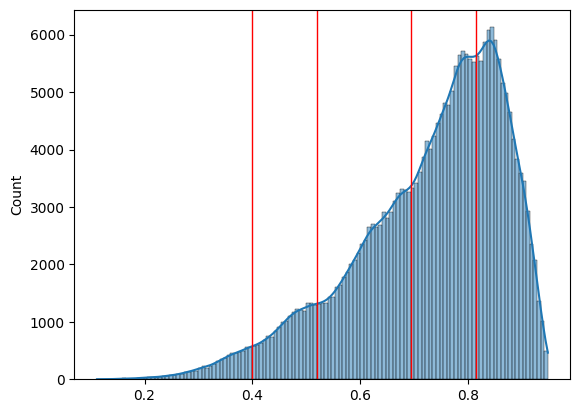

In [8]:
import seaborn as sns
# Create the histogram with KDE using Seaborn
sns.histplot(data, bins=125, kde=True)
for i in bin_edges[valleys[[7,10,14,17]]+1]:
    plt.axvline(x=i, color='red', linestyle='-', linewidth=1)

In [9]:
edge_list = bin_edges[valleys[[7,10,14,17]]+1]
edge_list

array([0.39941986, 0.51981407, 0.69371681, 0.81411102])

In [10]:
limit = []
for i in range(len(edge_list)):
    lower_limit = edge_list[i-1] if i != 0 else 0
    upper_limit = 1 if i == len(edge_list) else edge_list[i] 
    limit.append((lower_limit,upper_limit))
limit.append((limit[-1][1],1))
limit

[(0, 0.399419858728032),
 (0.399419858728032, 0.519814065862464),
 (0.519814065862464, 0.693716809501088),
 (0.693716809501088, 0.81411101663552),
 (0.81411101663552, 1)]

In [11]:
for lower_limit, upper_limit in limit:
    print(df_labeled[(df_labeled['qed'] >= lower_limit) & (df_labeled['qed'] < upper_limit)].shape)

(6868, 6)
(17544, 6)
(60325, 6)
(83895, 6)
(80823, 6)


In [14]:
df_labeled[(df_labeled['qed'] >= edge_list[0]) & (df_labeled['qed'] < edge_list[1])]

,smiles,logP,qed,SAS,label
8,Cc1c(/C=N/c2cc(Br)ccn2)c(O)n2c(nc3ccccc32)c1C#N,4.28130,0.483079,3.073935,2
46,COC(=O)[C@](NC(=O)c1cccc(Cl)c1)(Nc1ccc(Br)c[nH...,3.19010,0.515070,3.788625,3
58,Cc1occc1C(=O)/C(C#N)=C\c1cccc(C(F)(F)F)c1,4.39670,0.459245,2.477264,2
64,C=CCn1c(S[C@H](C)C(=O)N2CCC(C)CC2)nnc1-c1ccc(C...,4.52360,0.501178,2.745497,1
65,CCO[C@H]1C(=O)O[C@H]([C@@H](O)CO)C1=O,-1.76080,0.441574,4.085911,3
...,...,...,...,...,...
249378,COc1ccc(-c2noc(C[NH+]3CCN(Cn4c(=O)n(C)c5ccccc5...,0.75680,0.489642,3.313877,1
249380,Cc1ccc(CNC(=O)c2cc3cc(S(=O)(=O)N(C)C)ccc3n2Cc2...,4.17832,0.431321,2.157570,1
249405,O=C(CCc1c[nH]c2ccccc12)Nc1ccc(N2CCc3sccc3C2)nc1,4.75840,0.483660,2.383562,1
249430,CCOc1ccc2nc(N(C[C@@H]3CCCO3)C(=O)c3ccccc3S(C)(...,3.92430,0.513388,2.876072,0


In [20]:
matrix["label"] = df_labeled['label']
matrix.corr()

,C,N,O,S,F,P,Cl,Br,I,SP,...,total_single,total_double,total_triple,total_aromatic,total_conjugated_bond,total_bond_in_ring,total_STEREOZ,total_STEREOE,total_STEREONONE,label
C,1.000000,0.234528,0.230464,-0.063464,-0.058090,-0.022484,-0.055177,-0.111680,-0.044501,-0.007368,...,0.387105,0.240095,-0.008036,0.570091,0.621234,0.790220,0.020001,0.036382,0.920718,-0.500413
N,0.234528,1.000000,-0.174346,-0.028264,-0.080505,-0.021209,-0.052906,-0.094658,-0.033502,0.046630,...,0.079657,0.030695,0.043433,0.357218,0.368177,0.391252,-0.002307,-0.010943,0.428267,-0.379378
O,0.230464,-0.174346,1.000000,0.092369,-0.071150,0.018623,-0.032515,-0.049897,-0.015161,-0.076193,...,0.207687,0.639419,-0.077219,0.077353,0.285538,0.130650,0.053160,0.037550,0.367670,0.020223
S,-0.063464,-0.028264,0.092369,1.000000,-0.056897,-0.002044,-0.007557,-0.022782,-0.009901,-0.014161,...,-0.091795,0.271590,-0.013082,0.097969,0.055613,0.047438,0.072268,0.015431,0.079636,0.082797
F,-0.058090,-0.080505,-0.071150,-0.056897,1.000000,-0.005804,-0.049490,-0.026149,-0.009015,-0.014817,...,0.031528,-0.054860,-0.015323,0.024784,0.002011,-0.053544,-0.008960,-0.024220,0.038393,0.066383
P,-0.022484,-0.021209,0.018623,-0.002044,-0.005804,1.000000,0.002415,-0.001375,-0.001161,-0.000176,...,-0.002477,0.000394,0.000043,-0.014046,-0.018687,-0.014870,-0.002546,-0.001998,-0.015726,0.007297
Cl,-0.055177,-0.052906,-0.032515,-0.007557,-0.049490,0.002415,1.000000,-0.039201,-0.009199,-0.010916,...,-0.099262,0.012603,-0.010560,0.080769,0.072172,-0.007358,0.016660,0.023920,0.003613,0.044279
Br,-0.111680,-0.094658,-0.049897,-0.022782,-0.026149,-0.001375,-0.039201,1.000000,-0.004578,-0.012300,...,-0.114075,-0.031581,-0.012000,0.001176,-0.008678,-0.064968,0.017669,0.031253,-0.097187,0.056572
I,-0.044501,-0.033502,-0.015161,-0.009901,-0.009015,-0.001161,-0.009199,-0.004578,1.000000,-0.001987,...,-0.048518,-0.005305,-0.001951,-0.002270,-0.000639,-0.027167,0.009549,0.012584,-0.042275,0.017762
SP,-0.007368,0.046630,-0.076193,-0.014161,-0.014817,-0.000176,-0.010916,-0.012300,-0.001987,1.000000,...,-0.054185,-0.041330,0.993427,-0.027893,0.011702,-0.070675,0.043561,0.046791,-0.034155,0.000070


<Axes: >

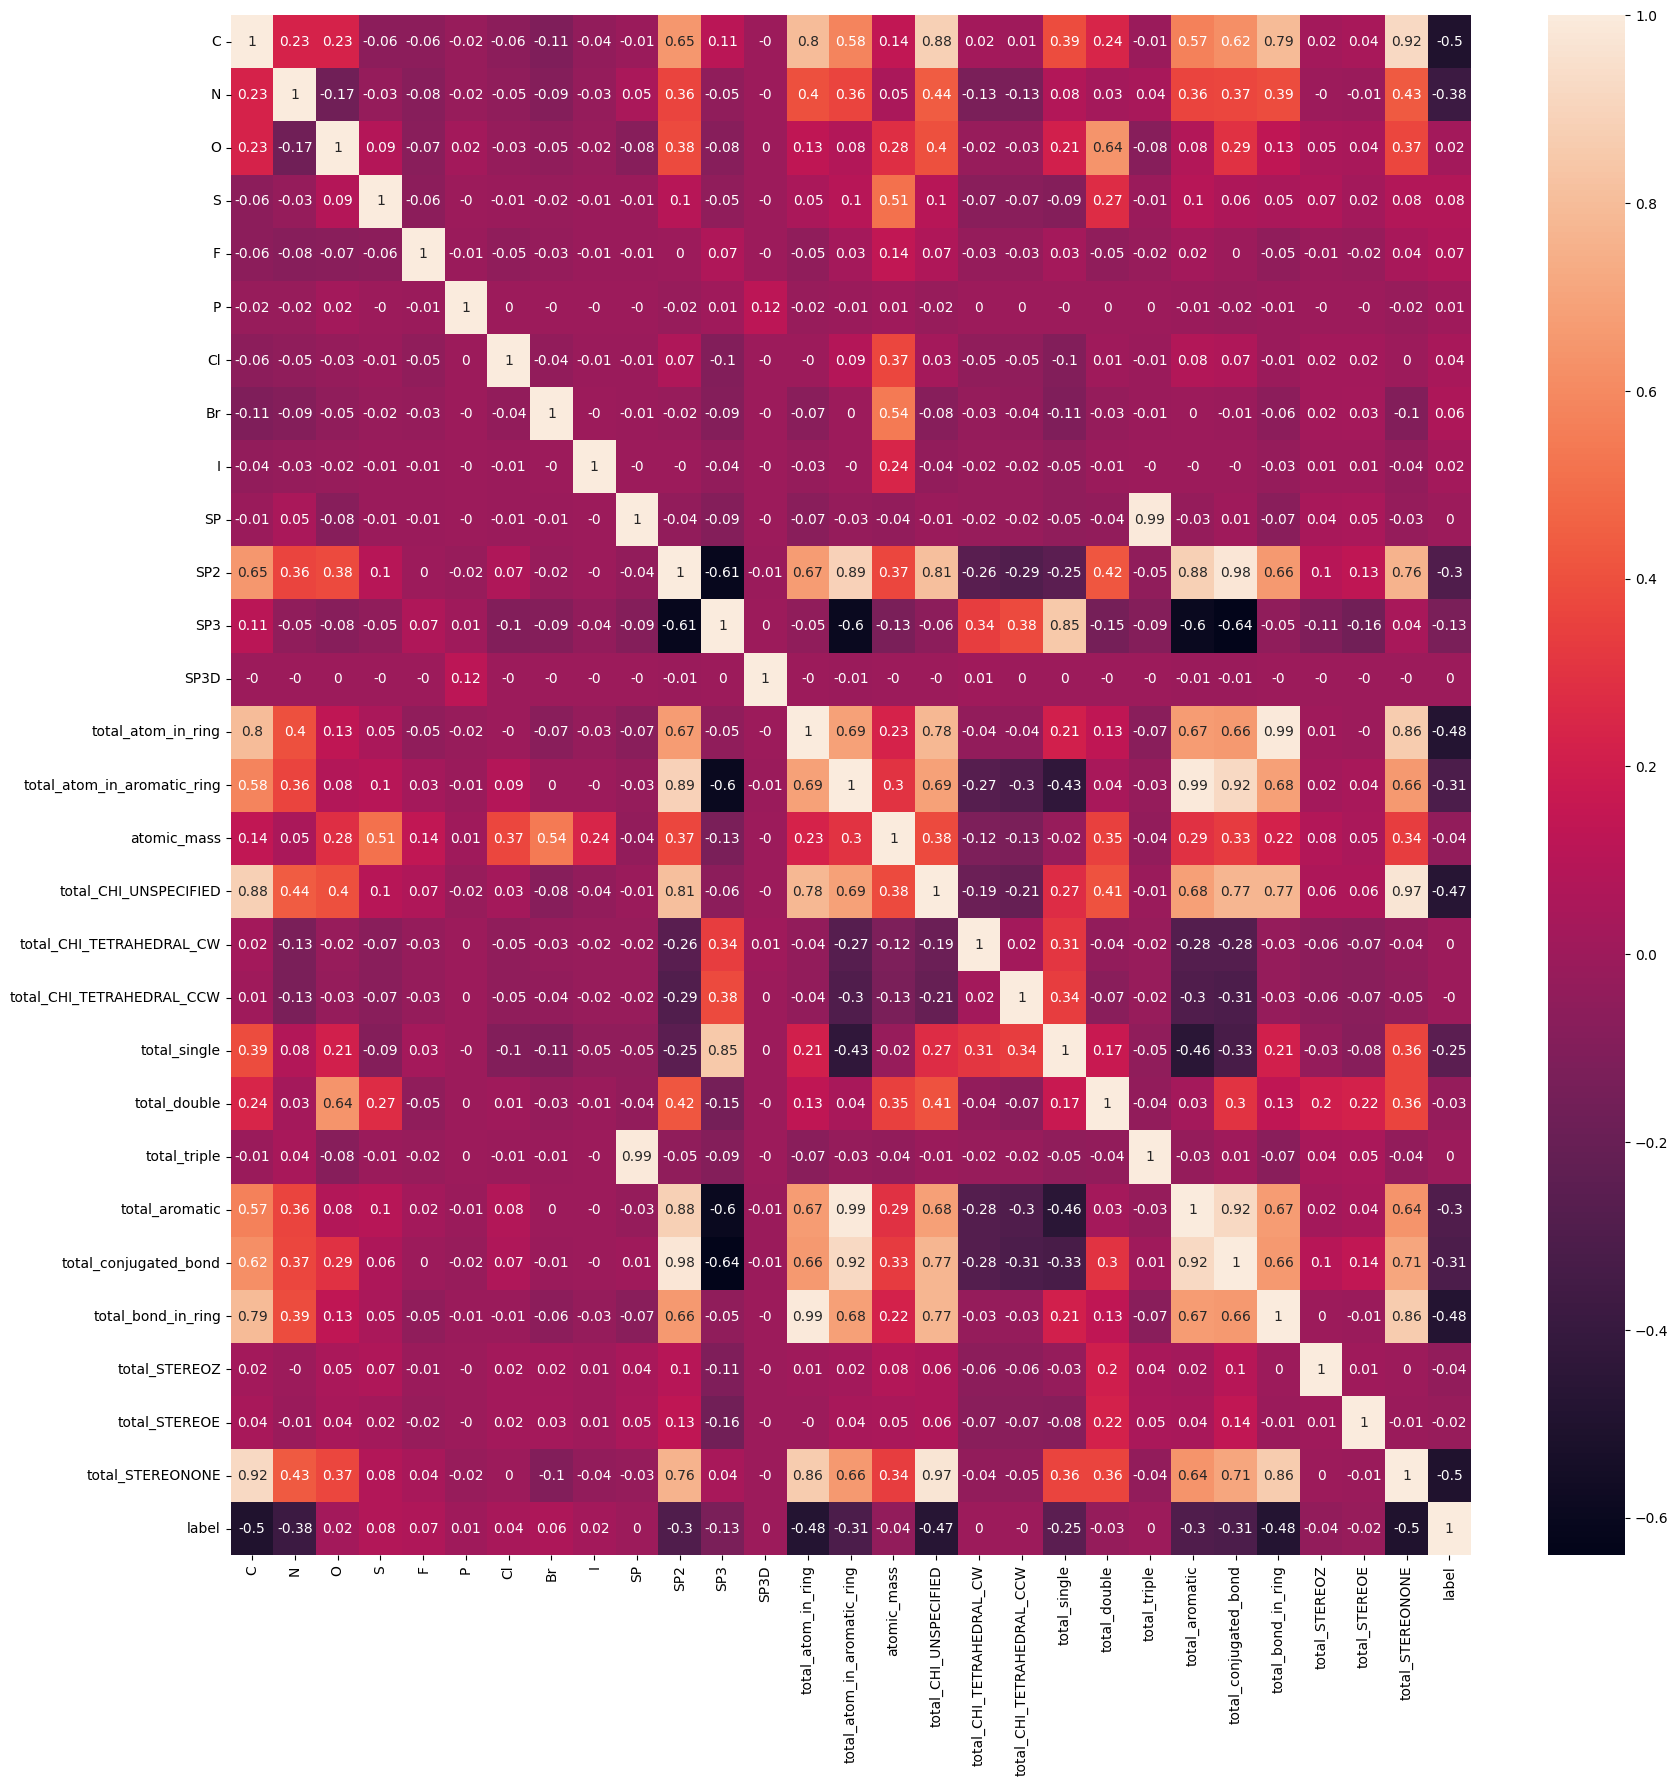

In [25]:
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(matrix.corr().round(2), annot=True)